In [4]:
### IMPORTING LIBRARIES ###
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import os
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Loading and cleaning data 

In [ ]:
artists = pd.read_csv('data/artists.csv')
data_by_artists = pd.read_csv('data/data_by_artist_o.csv')
genres = pd.read_csv('data/data_by_genres_o.csv')
tracks = pd.read_csv('data/tracks.csv')

In [ ]:
artists

,followers,popularity
count,1.104336e+06,1.104349e+06
mean,1.074304e+04,9.083884e+00
std,2.609554e+05,1.376310e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.900000e+01,2.000000e+00
75%,4.510000e+02,1.400000e+01
max,7.890023e+07,1.000000e+02


In [7]:
data_by_artists

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,[],麥志誠,0.512000,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2
28677,[],黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5,1,11
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2


In [8]:
genres.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


In [9]:
tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


# READING GFRIEND DATA

In [10]:
artists.loc[artists['name'] == 'GFRIEND']

,id,followers,genres,name,popularity
142585,0qlWcS66ohOIi0M8JZwPft,1124418.0,"['k-pop', 'k-pop girl group']",GFRIEND,67


In [11]:
data_by_artists.loc[data_by_artists['artists'] == 'GFRIEND']

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
8725,"['k-pop', 'k-pop girl group']",GFRIEND,0.00548,0.621,199133.0,0.821,0.000578,0.142,-3.662,0.0364,120.062,0.646,77.0,6,0,2


In [12]:
gfriend_data = tracks.loc[tracks['artists'] == "['GFRIEND']"].sort_values(by=['release_date'])
gfriend_data.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
278537,2rFRa1eJ8RqlINbJCZwdtt,Glass Bead,52,203482,0,['GFRIEND'],['0qlWcS66ohOIi0M8JZwPft'],2015-01-15,0.695,0.870,6,-2.660,1,0.0359,0.200,0.0,0.0512,0.697,114.022,4
210712,6x7fux7bZEfnChKx3nhSZn,Me Gustas Tu,62,220745,0,['GFRIEND'],['0qlWcS66ohOIi0M8JZwPft'],2015-07-23,0.646,0.923,8,-1.309,1,0.0613,0.166,0.0,0.0507,0.703,106.086,4
278742,3CVeGXpoPKJQ9JuhPp3mpL,Rough,58,209105,0,['GFRIEND'],['0qlWcS66ohOIi0M8JZwPft'],2016-01-25,0.613,0.912,8,-2.464,1,0.0366,0.152,0.0,0.1110,0.734,112.005,4


[Text(0.5, 1.0, 'GFRIEND Audio characteristics over time'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Measure')]

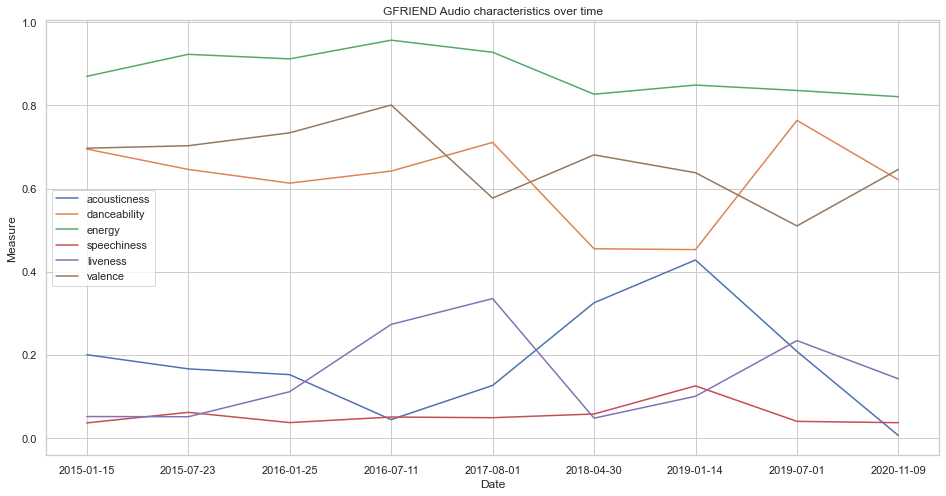

In [13]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = gfriend_data.groupby("release_date")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set(title='GFRIEND Audio characteristics over time', 
    xlabel='Date',
    ylabel='Measure')

# READING TWICE DATA

In [14]:
twice_data = tracks.loc[tracks['artists'] == "['TWICE']"].sort_values(by=['release_date'])
twice_data.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
560739,2meelhWOyRhHrdD0N5KVLW,Do it again,40,206546,0,['TWICE'],['7n2Ycct7Beij7Dj7meI4X0'],2015,0.73,0.936,7,-0.948,1,0.0384,0.00795,0.000576,0.1280,0.817,136.983,4
560495,2SivUkzgql54t0O4dH1b7O,Like OOH-AHH,54,215091,0,['TWICE'],['7n2Ycct7Beij7Dj7meI4X0'],2015,0.72,0.876,6,-1.166,1,0.0776,0.24100,0.000101,0.3810,0.694,141.997,4
575491,7phEa67BIqrBSBwHrECeqr,Like A Fool,50,214453,0,['TWICE'],['7n2Ycct7Beij7Dj7meI4X0'],2015-10-20,0.61,0.806,10,-4.515,1,0.1270,0.06220,0.037300,0.0975,0.472,177.881,4


In [15]:
twice_data['year'] = twice_data.release_date.str[:4]
twice_data.sort_values(by=['year']).head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
560739,2meelhWOyRhHrdD0N5KVLW,Do it again,40,206546,0,['TWICE'],['7n2Ycct7Beij7Dj7meI4X0'],2015,0.73,0.936,...,-0.948,1,0.0384,0.00795,0.000576,0.1280,0.817,136.983,4,2015
560495,2SivUkzgql54t0O4dH1b7O,Like OOH-AHH,54,215091,0,['TWICE'],['7n2Ycct7Beij7Dj7meI4X0'],2015,0.72,0.876,...,-1.166,1,0.0776,0.24100,0.000101,0.3810,0.694,141.997,4,2015
575491,7phEa67BIqrBSBwHrECeqr,Like A Fool,50,214453,0,['TWICE'],['7n2Ycct7Beij7Dj7meI4X0'],2015-10-20,0.61,0.806,...,-4.515,1,0.1270,0.06220,0.037300,0.0975,0.472,177.881,4,2015


[]

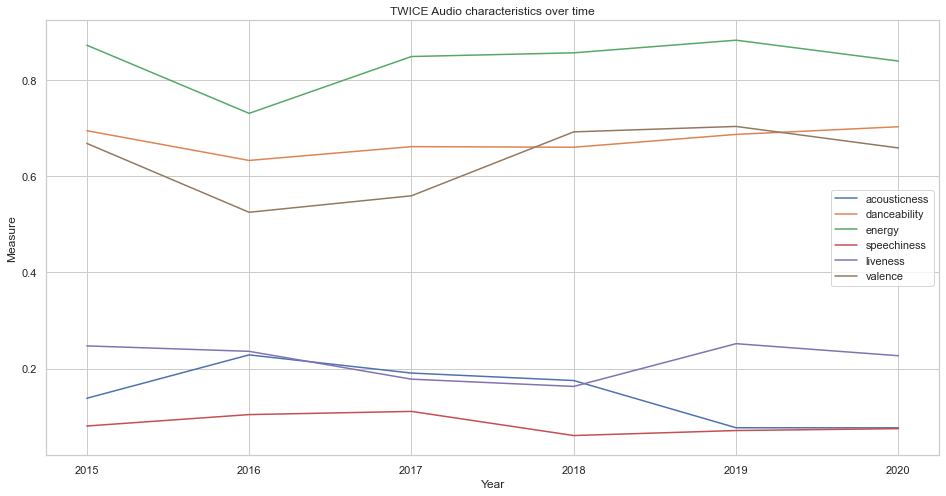

In [16]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = twice_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col) 
ax.set(title='TWICE Audio characteristics over time', xlabel='Year', ylabel='Measure')
plt.plot()

# Generating data for all k-pop girl groups 

In [17]:
girl_groups = data_by_artists.loc[data_by_artists['genres'].str.contains( "'k-pop girl group'")]
girl_groups.head(3)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
20,"['k-pop', 'k-pop girl group']",(G)I-DLE,0.011235,0.6405,196969.000000,0.800,0.000000,0.2520,-4.473500,0.048750,151.01325,0.375,79.250000,1,0,4
73,"['dance pop', 'k-pop', 'k-pop girl group', 'po...",2NE1,0.085223,0.6880,217679.333333,0.732,0.033413,0.0928,-3.418333,0.038833,128.23700,0.590,58.666667,4,1,6
110,"['k-pop', 'k-pop girl group']",4Minute,0.005890,0.5400,192400.000000,0.929,0.000004,0.4240,-2.646000,0.278000,176.02300,0.624,61.000000,7,1,2


In [18]:
girl_group_tracks = pd.DataFrame()
for artists in girl_groups['artists']:
    girl_group_tracks = girl_group_tracks.append(tracks.loc[tracks['artists'] == f"['{artists}']"].sort_values(by=['release_date']))
girl_group_tracks = girl_group_tracks.drop_duplicates(subset=['name'])
girl_group_tracks.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
279266,2ezKXygNO30pXyDQXkm6oD,LATATA,65,202773,0,['(G)I-DLE'],['2AfmfGFbe0A0WsTYm0SDTx'],2018-05-02,0.774,0.792,9,-4.019,0,0.2240,0.00427,0.000001,0.283,0.505,98.100,4
279311,7gr57cYekMWriyJYbT7oZ4,HANN (Alone),63,205820,0,['(G)I-DLE'],['2AfmfGFbe0A0WsTYm0SDTx'],2018-08-14,0.709,0.718,6,-3.315,0,0.0312,0.05900,0.000000,0.167,0.240,104.971,4
337143,0q6boCcLaWYPIy2vOsksFg,Senorita,62,197616,0,['(G)I-DLE'],['2AfmfGFbe0A0WsTYm0SDTx'],2019-02-26,0.782,0.808,0,-3.139,1,0.0362,0.01590,0.000043,0.331,0.420,120.021,4


In [19]:
girl_group_tracks['year'] = girl_group_tracks.release_date.str[:4]
girl_group_tracks['month'] = girl_group_tracks.release_date.str[5:7]
girl_group_tracks.sort_values(by=['year']).head()
girl_group_tracks = girl_group_tracks[~girl_group_tracks['year'].isin(['2021'])]

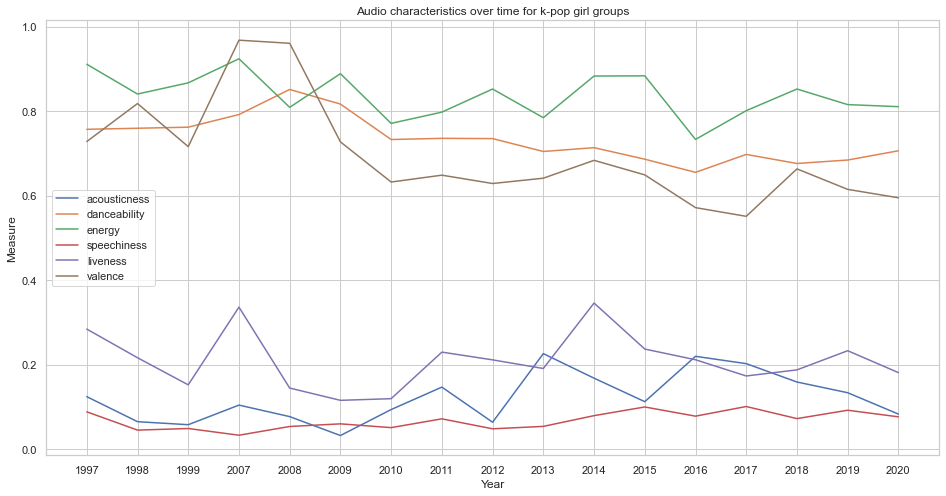

In [20]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = girl_group_tracks.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over time for k-pop girl groups')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')          
plt.show()

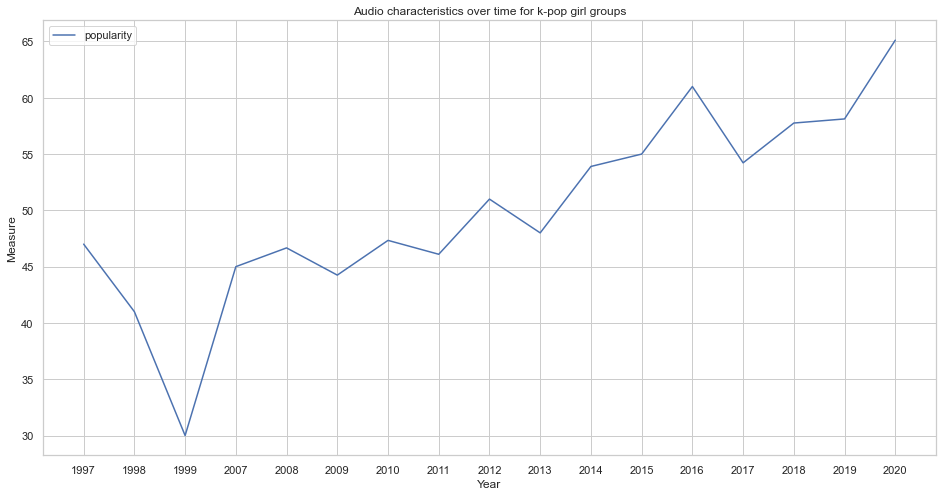

In [21]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["popularity"]
for col in columns:
    x = girl_group_tracks.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over time for k-pop girl groups')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')          
plt.show()

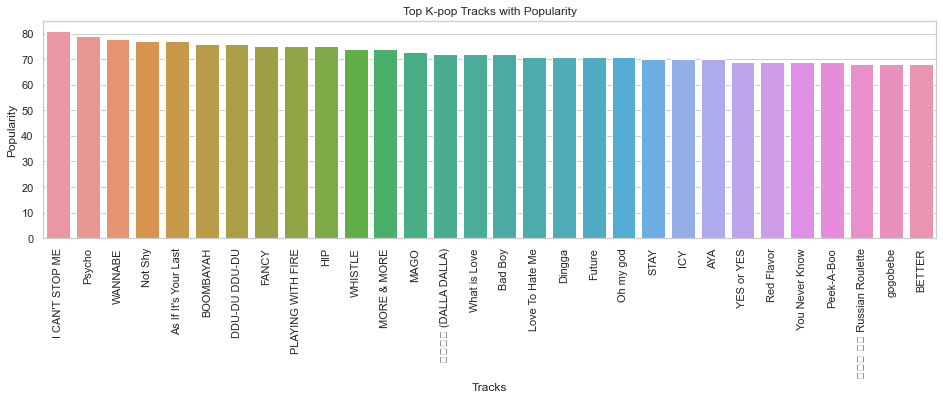

In [22]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
x = girl_group_tracks.groupby("name")["popularity"].mean().sort_values(ascending=False).head(30)
axis = sns.barplot(x.index, x)
axis.set(title='Top K-pop Tracks with Popularity',
         xlabel='Tracks', 
         ylabel='Popularity')
plt.xticks(rotation = 90)
plt.show()

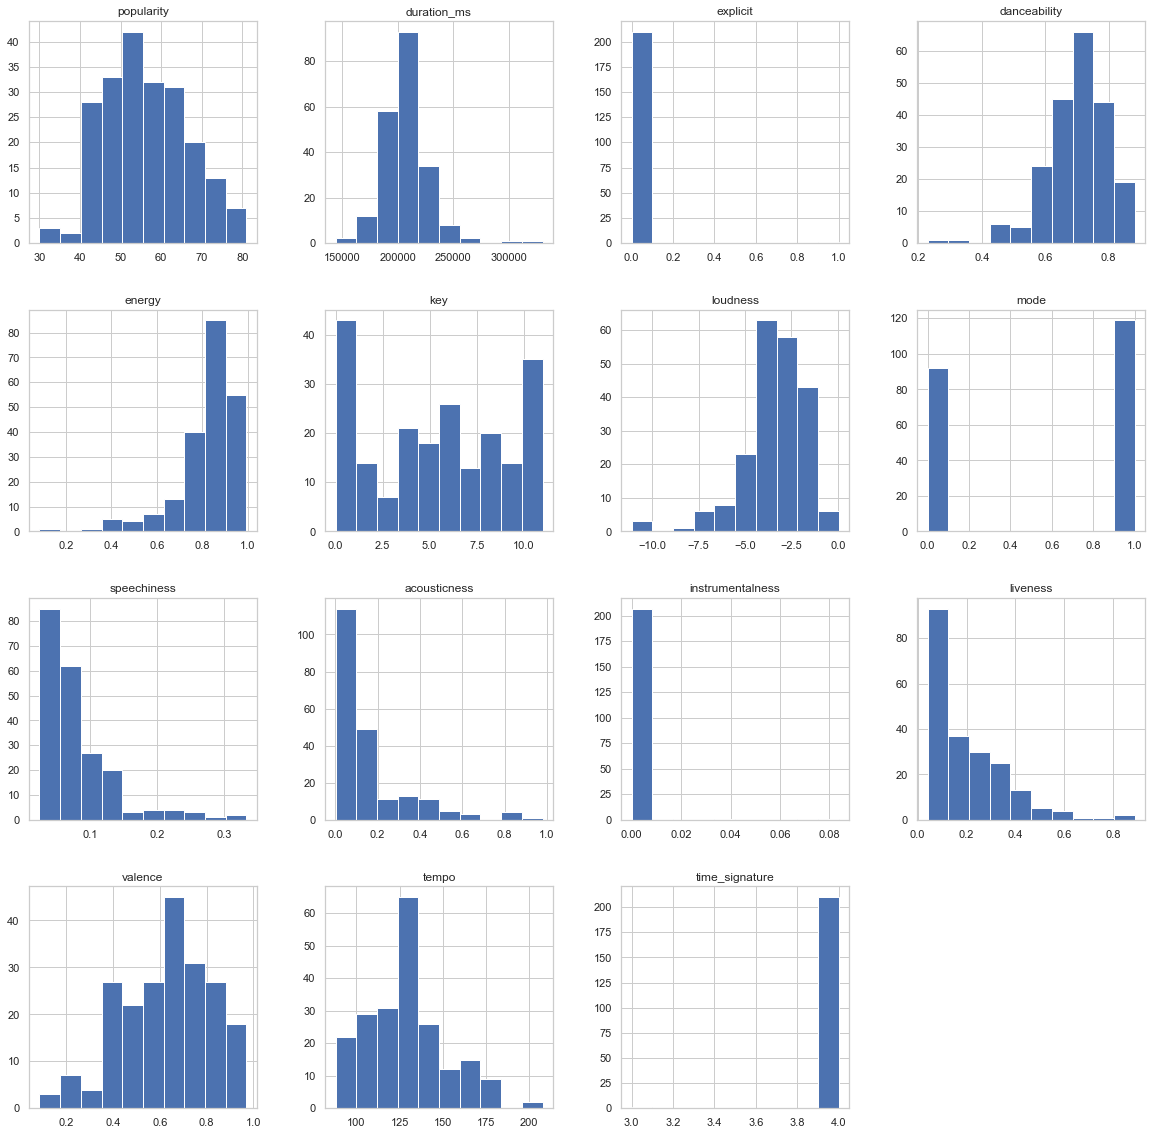

In [23]:
girl_group_tracks.hist(figsize=(20, 20))
plt.show()

# Generating data for all k-pop girl groups in 2020

In [24]:
girl_group_tracks_2020 = girl_group_tracks.loc[girl_group_tracks['year'] == '2020']
girl_group_tracks_2020.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month
279955,2DmRXiyn03tOqKgEJXlaiJ,Oh my god,71,195867,0,['(G)I-DLE'],['2AfmfGFbe0A0WsTYm0SDTx'],2020-04-06,0.794,0.762,...,0,0.0392,0.0358,0.000001,0.1910,0.482,109.970,4,2020,04
280003,2fJ70dRX7J4jiVxKUQQp7C,DUMDi DUMDi,66,210640,0,['(G)I-DLE'],['2AfmfGFbe0A0WsTYm0SDTx'],2020-08-03,0.759,0.914,...,1,0.0592,0.0250,0.000004,0.0760,0.674,123.047,4,2020,08
562875,78VxuxuTcKnhxEDtncc1QS,How You Like That,50,181307,0,['BLACKPINK'],['41MozSoPIsD1dJM0CLPjZF'],2020-06-26,0.828,0.782,...,1,0.0918,0.0694,0.000034,0.0551,0.351,130.013,4,2020,06


Text(0.5, 0, 'Month')

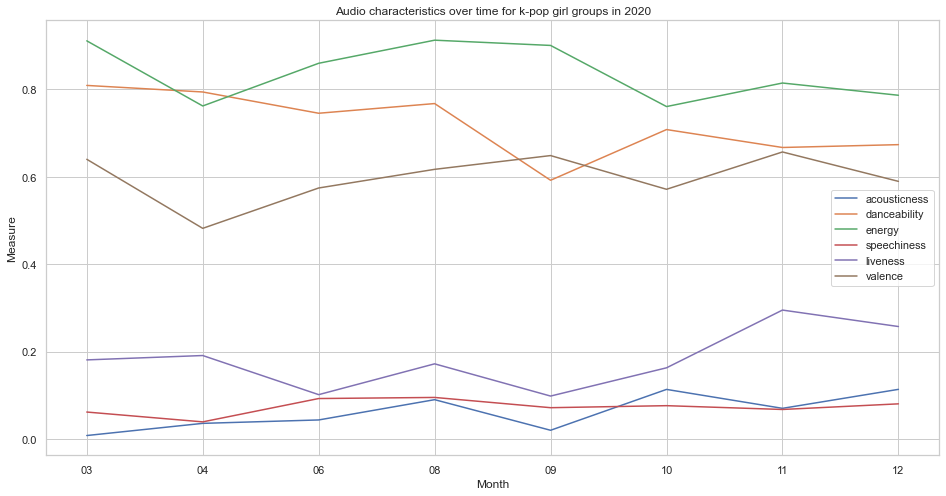

In [25]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = girl_group_tracks_2020.groupby("month")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over time for k-pop girl groups in 2020')
ax.set_ylabel('Measure')
ax.set_xlabel('Month')          

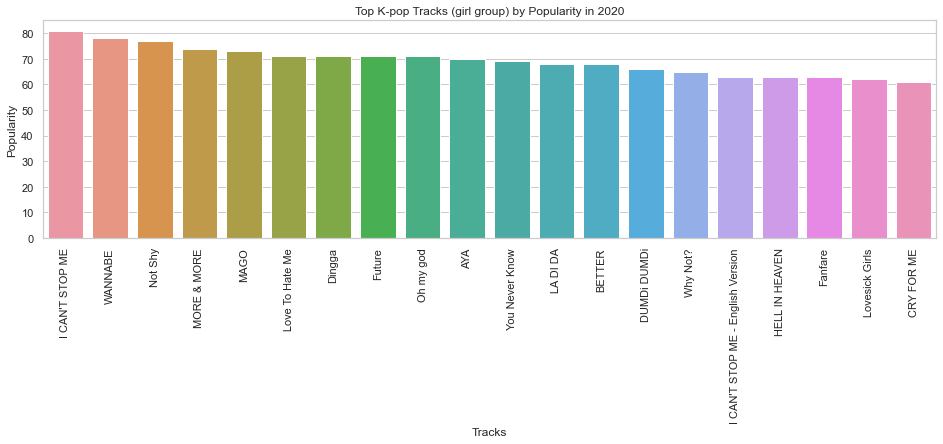

In [26]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
x = girl_group_tracks_2020.groupby("name")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x)
axis.set_title('Top K-pop Tracks (girl group) by Popularity in 2020')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)
plt.show()

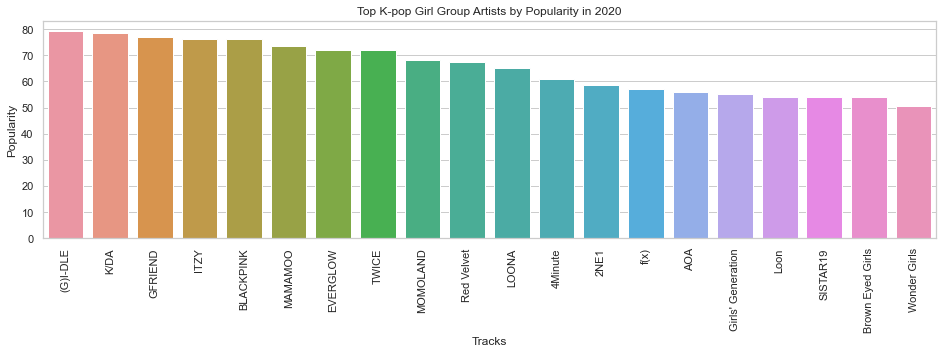

In [27]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
x = girl_groups.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x)
axis.set_title('Top K-pop Girl Group Artists by Popularity in 2020')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)
plt.show()

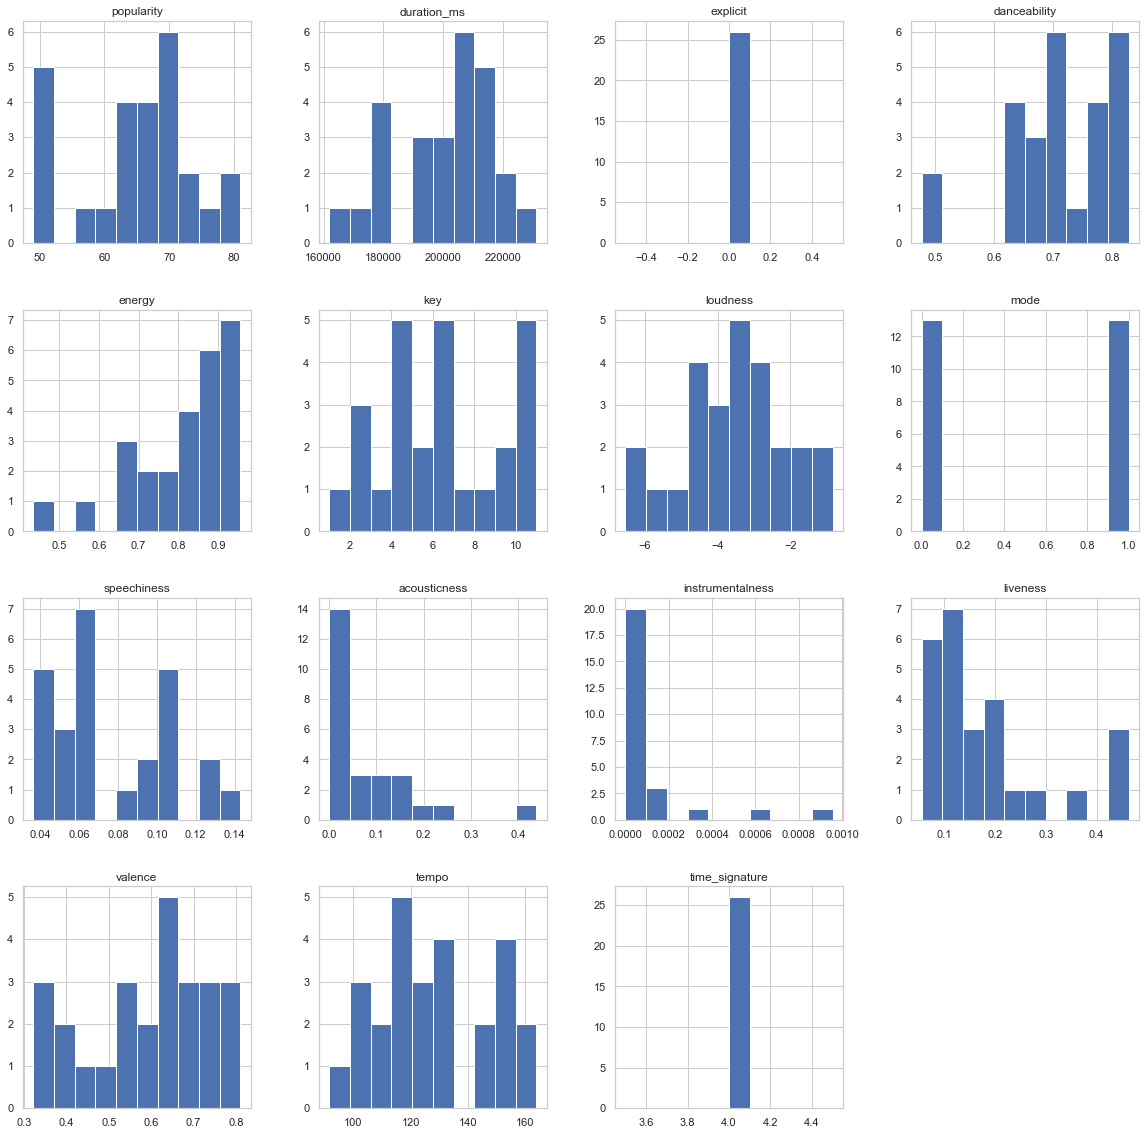

In [28]:
girl_group_tracks_2020.hist(figsize=(20, 20))
plt.show()

# Generating Data for K-pop Boy Group Tracks

In [29]:
boy_groups = data_by_artists.loc[data_by_artists['genres'].str.contains( "'k-pop boy group'")]
boy_groups.head(3)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
74,"['k-pop', 'k-pop boy group', 'korean pop']",2PM,0.176000,0.615000,200827.000000,0.901000,0.0,0.204000,-4.457,0.030200,131.989000,0.779000,48.000000,3,1,2
245,"['k-pop', 'k-pop boy group']",ATEEZ,0.050300,0.572000,199013.000000,0.964000,0.0,0.372000,-1.949,0.123000,129.979000,0.519000,68.000000,4,0,2
1951,"['k-pop', 'k-pop boy group']",BIGBANG,0.165583,0.695111,235170.888889,0.760444,0.0,0.256022,-4.674,0.067922,121.424667,0.486556,60.777778,6,1,18


In [30]:
boy_groups_tracks = pd.DataFrame()
for artists in boy_groups['artists']:
    boy_groups_tracks = boy_groups_tracks.append(tracks.loc[tracks['artists'] == f"['{artists}']"].sort_values(by=['release_date']))

boy_groups_tracks = boy_groups_tracks.drop_duplicates(subset=['name'])
boy_groups_tracks['year'] = boy_groups_tracks.release_date.str[:4]
boy_groups_tracks['month'] = boy_groups_tracks.release_date.str[5:7]
boy_groups_tracks = boy_groups_tracks[~boy_groups_tracks['year'].isin(['2021'])]
boy_groups_tracks.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month
173277,75aEpPgve8j7tK8wGiL3aE,Tetris - Radio Version,42,173893,0,['2PM'],['2SWPwzY5BM9wE8c3anLu72'],2003,0.632,0.935,...,0,0.0337,0.00117,0.906000,0.344,0.897,140.030,4,2003,
558080,57NKiDIQ2iXk5KU4XW4Qup,Heartbeat,43,193200,0,['2PM'],['5iRPbkcPmqAFFwDUj6ywVS'],2009,0.574,0.881,...,1,0.1700,0.00122,0.000002,0.242,0.327,134.941,4,2009,
277403,61SZ4Z7hd0noaQd0qgWC1v,Hands Up,29,198827,0,['2PM'],['5iRPbkcPmqAFFwDUj6ywVS'],2011-01-01,0.815,0.823,...,0,0.0395,0.00122,0.000022,0.238,0.608,124.941,4,2011,01


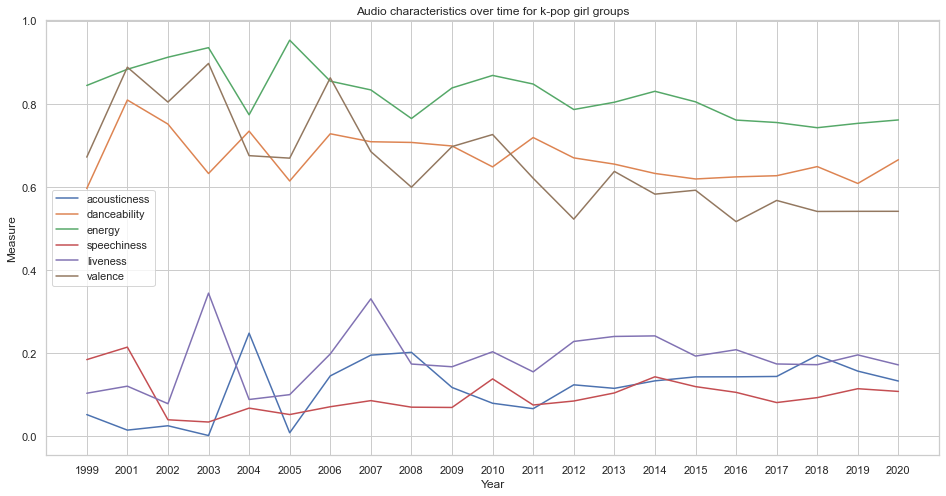

In [31]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = boy_groups_tracks.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over time for k-pop girl groups')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')          
plt.show()

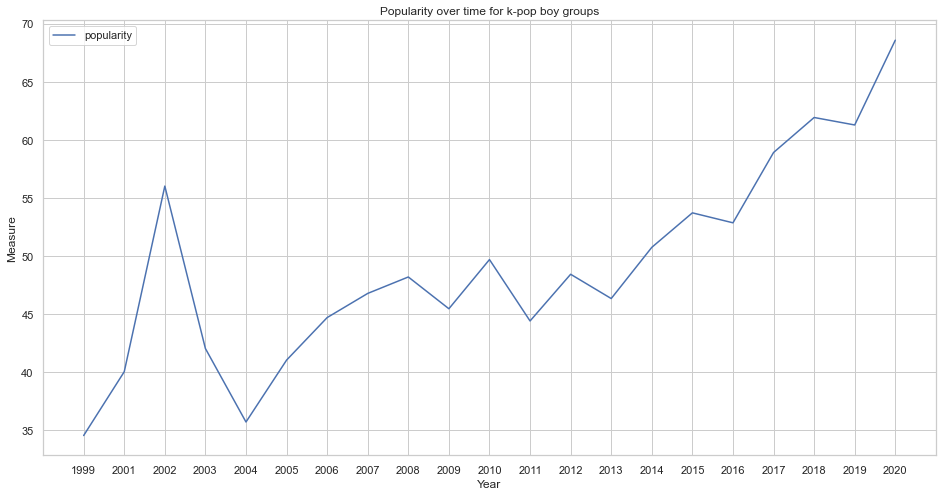

In [32]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["popularity"]
for col in columns:
    x = boy_groups_tracks.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Popularity over time for k-pop boy groups')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')          
plt.show()

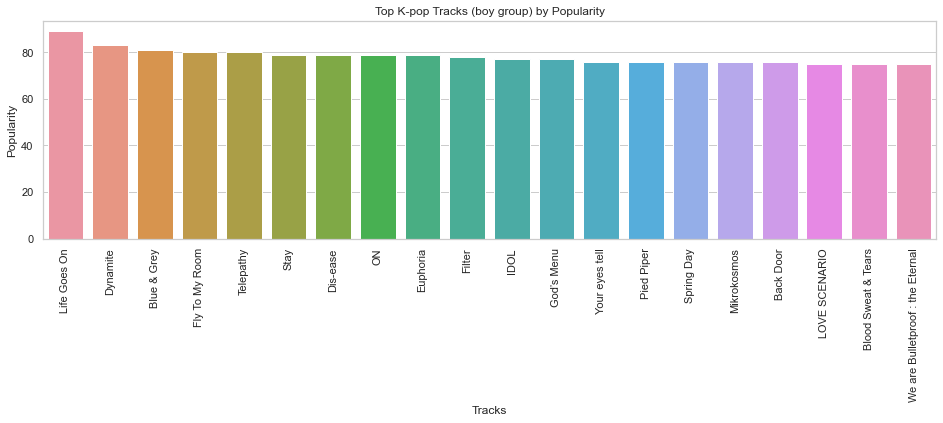

In [33]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
x = boy_groups_tracks.groupby("name")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x)
axis.set_title('Top K-pop Tracks (boy group) by Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)
plt.show()

# Boy vs Girl Group Analysis

[]

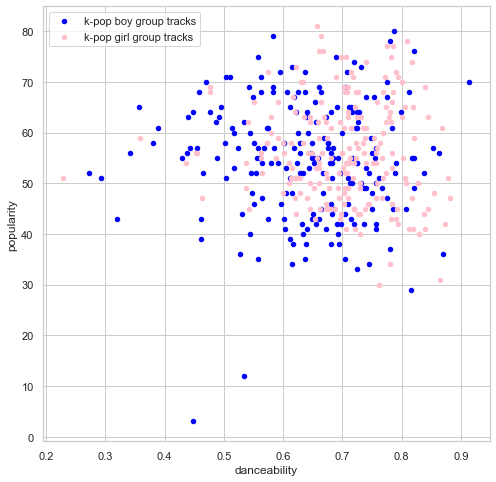

In [34]:
ax = boy_groups_tracks.sample(n=len(girl_group_tracks)).plot.scatter(x="danceability", y="popularity", c='blue',label="k-pop boy group tracks", figsize=(8,8))
girl_group_tracks.plot.scatter(x="danceability", y="popularity", c='pink',label="k-pop girl group tracks", ax=ax)
plt.plot()

[]

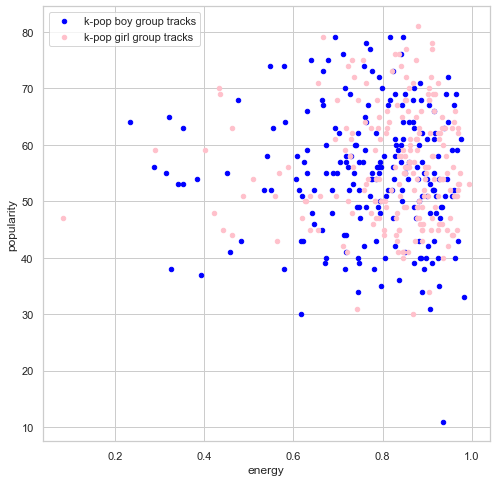

In [35]:
ax = boy_groups_tracks.sample(n=len(girl_group_tracks)).plot.scatter(x="energy", y="popularity", c='blue',label="k-pop boy group tracks", figsize=(8,8))
girl_group_tracks.plot.scatter(x="energy", y="popularity", c='pink',label="k-pop girl group tracks", ax=ax)
plt.plot()

[]

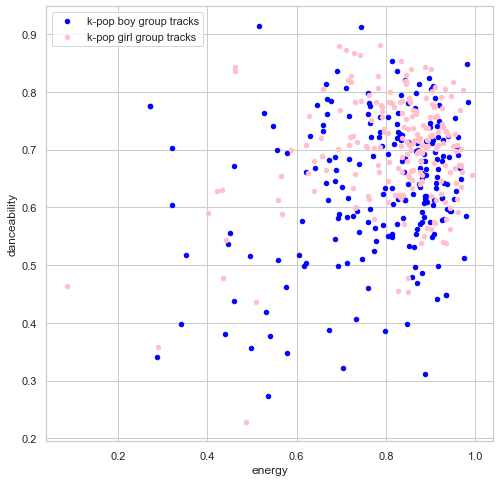

In [36]:
ax = boy_groups_tracks.sample(n=len(girl_group_tracks)).plot.scatter(x="energy", y="danceability", c='blue',label="k-pop boy group tracks", figsize=(8,8))
girl_group_tracks.plot.scatter(x="energy", y="danceability", c='pink',label="k-pop girl group tracks", ax=ax)
plt.plot()

In [37]:
girl_group_tracks = girl_group_tracks[~girl_group_tracks['year'].isin(['1997','1998','1999'])]
boy_groups_tracks = boy_groups_tracks[~boy_groups_tracks['year'].isin(['1997','1998','1999','2001','2002','2003','2004','2005','2006'])]

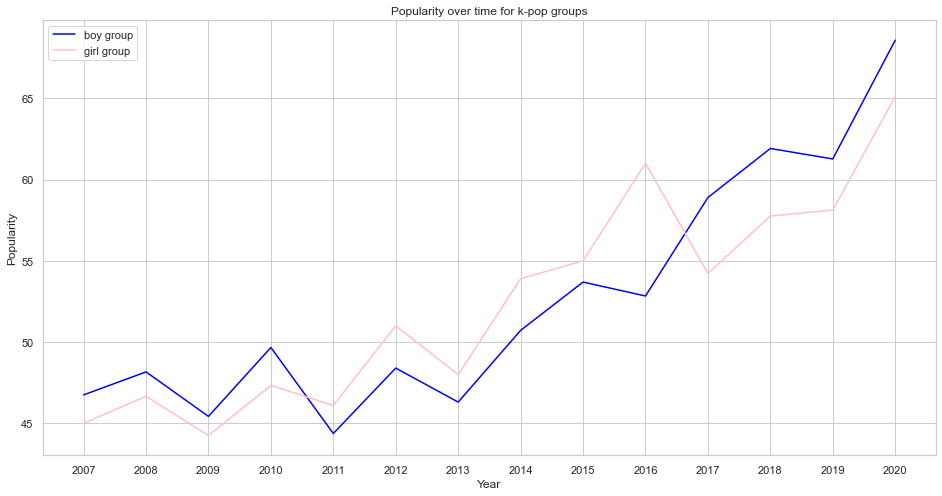

In [38]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["popularity"]

for col in columns:
    x = boy_groups_tracks.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,color='blue',label='boy group')
    x = girl_group_tracks.groupby("year")[col].mean()
    sns.lineplot(x=x.index,y=x,color='pink', label='girl group', ax=ax)

ax.set_title('Popularity over time for k-pop groups')
ax.set_ylabel('Popularity')
ax.set_xlabel('Year')          
plt.show()

# Generating data for pop songs

In [39]:
pop = data_by_artists.loc[data_by_artists['genres'].str.contains("'pop'")]
pop.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,0.258619,0.630758,217060.550292,0.624017,0.025102,0.175811,-6.806504,0.087713,119.783055,0.486428,60.331312,5.278246,0.715008,27.212479
std,0.221402,0.104218,37017.223958,0.157501,0.088601,0.070123,2.330000,0.062309,16.051197,0.155182,11.281886,3.598773,0.451792,44.793430
min,0.000159,0.187333,52867.000000,0.092063,0.000000,0.047600,-19.854333,0.027100,63.842000,0.034600,0.000000,0.000000,0.000000,1.000000
25%,0.098460,0.565205,197329.000000,0.526960,0.000002,0.128825,-7.816000,0.046560,110.164202,0.384932,56.285714,2.000000,0.000000,4.000000
50%,0.191538,0.631111,214862.333333,0.641667,0.000116,0.165980,-6.349867,0.068800,119.280389,0.477484,62.000000,6.000000,1.000000,11.000000
75%,0.358409,0.686800,235312.000000,0.736643,0.004720,0.210460,-5.290032,0.102620,127.247059,0.589429,67.250000,8.000000,1.000000,28.000000
max,0.995500,0.957667,490538.375000,0.974000,0.930000,0.503333,-2.132000,0.400940,201.985000,0.978000,84.000000,11.000000,1.000000,440.000000


In [40]:
pop_tracks = pd.DataFrame()
for artists in pop['artists']:
    pop_tracks = pop_tracks.append(tracks.loc[tracks['artists'] == f"['{artists}']"].sort_values(by=['release_date']))
pop_tracks['year'] = pop_tracks.release_date.str[:4]
pop_tracks = pop_tracks[~pop_tracks['year'].isin(['2021'])]
pop_tracks.describe()

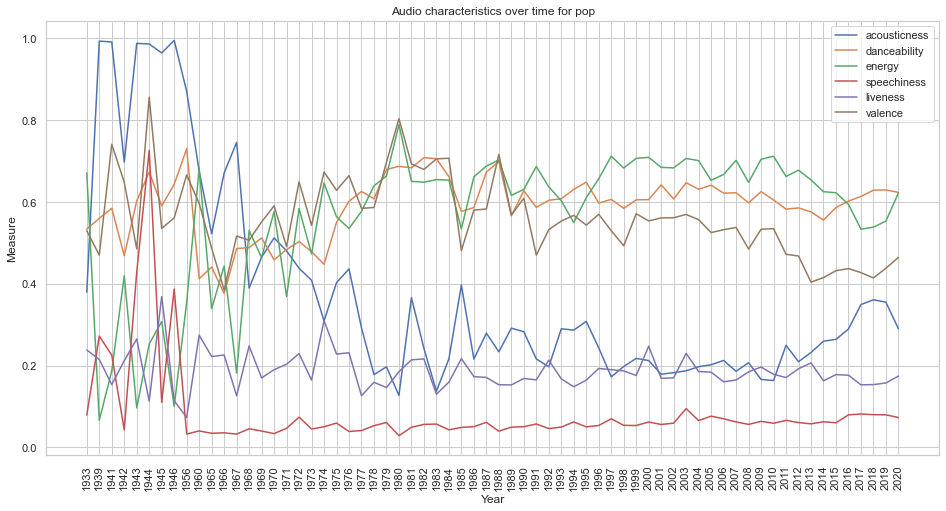

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = pop_tracks.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over time for pop')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')     
plt.xticks(rotation = 90)
plt.show()

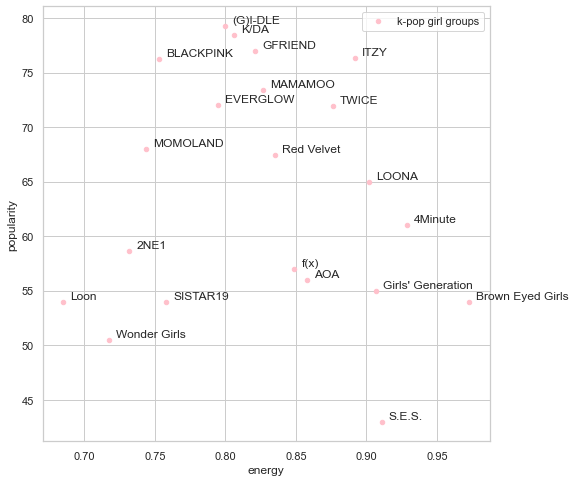

In [ ]:
girl_groups.plot.scatter(x="energy", y="popularity", c='pink',label="k-pop girl groups", figsize=(8,8))

for index in girl_groups.index:
    plt.text(x=girl_groups['energy'][index] +.005,
         y=girl_groups['popularity'][index] + .25,
         s=girl_groups['artists'][index])

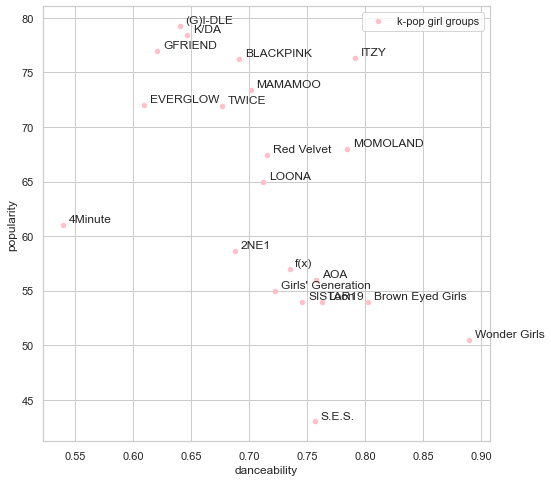

In [ ]:
girl_groups.plot.scatter(x="danceability", y="popularity", c='pink',label="k-pop girl groups", figsize=(8,8))

for index in girl_groups.index:
    plt.text(x=girl_groups['danceability'][index] +.005,
         y=girl_groups['popularity'][index] + .25,
         s=girl_groups['artists'][index])